In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft,ifft
from matplotlib import pyplot as plt
import os
import wave


In [ ]:
path = './dataset/ST-CMDS-20170001_1-OS/20170001P00184A0042.wav'
wav = wave.open(path,"rb") # 打开一个wav格式的声音文件流
num_frame = wav.getnframes() # 获取帧数
num_channel = wav.getnchannels() # 获取声道数
# print(num_channel)
framerate = wav.getframerate() # 获取帧速率
num_sample_width = wav.getsampwidth() # 获取实例的比特宽度，即每一帧的字节数
str_data = wav.readframes(num_frame) # 读取全部的帧

In [ ]:
wave_data = np.fromstring(str_data,dtype=np.short)
# 归一化
wave_data = wave_data * 1.0/max(abs(wave_data))
#将音频信号规整乘每行一路通道信号的格式，即该矩阵一行为一个通道的采样点，共nchannels行
wave_data = np.reshape(wave_data,[num_frame,num_channel]).T # .T 表示转置
wav.close()#关闭文件
frame_size = 512
fft_wave = fft(wave_data)
fft_wave_norm = fft(wave_data)/num_frame



In [ ]:
fft_wave_norm.shape

In [ ]:
NFFT = frame_size
overlap_size = 1.0/3 * frame_size #重叠部分采样点数overlapSize约为每帧点数的1/3~1/2
overlap_size = int(round(overlap_size))#取整


In [ ]:
spectrum,freqs,ts,fig = plt.specgram(wave_data[0],NFFT = NFFT,Fs =framerate,window=np.hanning(M = frame_size),noverlap=overlap_size,mode='default',scale_by_freq=True,sides='default',scale='dB',xextent=None)#绘制频谱图         
plt.xticks([])  #去掉横坐标值
plt.yticks([])  #去掉纵坐标值
plt.savefig('temp.jpg')
plt.show()
#plt.ylabel('Frequency')
#plt.xlabel('Time(s)')
#plt.title('Spectrogram')
 

In [2]:

def get_specgram_feature(file_dir):
    wav = wave.open(file_dir,"rb") # 打开一个wav格式的声音文件流
    num_frame = wav.getnframes() # 获取帧数
    num_channel = wav.getnchannels() # 获取声道数
    # print(num_channel)
    framerate = wav.getframerate() # 获取帧速率
    num_sample_width = wav.getsampwidth() # 获取实例的比特宽度，即每一帧的字节数
    str_data = wav.readframes(num_frame) # 读取全部的帧
    wave_data = np.fromstring(str_data,dtype=np.short)
    # 归一化
    wave_data = wave_data * 1.0/max(abs(wave_data))
    #将音频信号规整乘每行一路通道信号的格式，即该矩阵一行为一个通道的采样点，共nchannels行
    wave_data = np.reshape(wave_data,[num_frame,num_channel]).T # .T 表示转置
    wav.close()#关闭文件
    frame_size = 512
    fft_wave = fft(wave_data)
    fft_wave_norm = fft(wave_data)/num_frame

    NFFT = frame_size
    overlap_size = 1.0/3 * frame_size #重叠部分采样点数overlapSize约为每帧点数的1/3~1/2
    overlap_size = int(round(overlap_size))#取整
    spectrum,freqs,ts,fig = plt.specgram(wave_data[0],NFFT = NFFT,Fs =framerate,window=np.hanning(M = frame_size),noverlap=overlap_size,mode='default',scale_by_freq=True,sides='default',scale='dB',xextent=None)#绘制频谱图         
    return spectrum,freqs,ts

/data/jiaxin.gu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


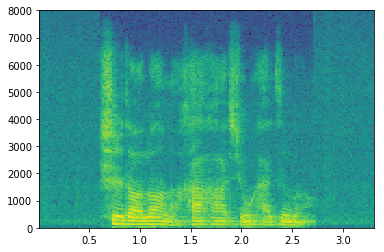

In [3]:
a,fsa,tsa = get_specgram_feature( './dataset/ST-CMDS-20170001_1-OS/20170001P00001A0002.wav')
b,fsb,tsb = get_specgram_feature( './dataset/ST-CMDS-20170001_1-OS/20170001P00001A0003.wav')

In [ ]:
b.shape

In [ ]:
tsb

In [ ]:
a_.shape

In [21]:
while a.shape[1] < 900:
    a = np.concatenate((a, a), axis=1)
a.shape
a = a[:,:900]
a.shape

a = np.reshape(a, [1, a.shape[0], a.shape[1]])

In [22]:
a.shape

(1, 257, 900)